# Taut String Animation 16.14
Created by: Wesley Terrill (04/02/2019)

Revision date: 04/02/2019


We'll plot at various times a wave $u(x,t)$ that starts as a standing wave shape, and then animate it.  We can imagine this as simulating a wave on a taut string.  Here $u$ is the transverse displacement (i.e., $y$ in our two-dimensional plots).  

$\begin{align}
  u(x,t) = \frac{32}{\pi^2}\Sigma(\frac{(-1)^m}{(2m+1)^2}(1-\cos(\frac{(2m+1)\pi}{8}))\cos(\omega_m t)\sin(k_m x)
  \;,
\end{align}$

with 
$\begin{align}
    k_m = \frac{m \pi}{L}
    \;,
    L = 8
\end{align}$

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [124]:
def u_wave(x_pts, t, m_max, L = 1.):
    """Returns the wave at time t.
    """
    y_pts = np.zeros(len(x_pts))
      
    for m in range(1, m_max):
        km = m * np.pi / L
        omega = km
        B_m = (1./(m**2 * np.pi**2))*(8*np.sin(m*np.pi/2))#-4*np.sin(m*np.pi))
        y_pts += B_m * np.sin(km * x_pts) * np.cos(omega*t)
        
    return y_pts

In [125]:
# Set up the array of x points (whatever looks good)
x_min = 0.
x_max = +1.
delta_x = 0.001
x_pts = np.arange(x_min, x_max, delta_x)

# Set up array of m-points
m_pts = np.arange(1,301,1)

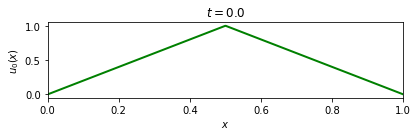

In [126]:
# Define the initial (t=0) wave form and the wave speed.
L = x_max

# Make a figure showing the initial wave.
t_now = 0.

fig = plt.figure(figsize=(6,2), num='Standing Wave')
ax = fig.add_subplot(1,1,1)
ax.set_xlim(x_min, x_max)
gap = 0.1
#ax.set_ylim(-2*A-gap, 2*A + gap)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u_0(x)$')
ax.set_title(rf'$t = {t_now:.1f}$')

line, = ax.plot(x_pts, 
                u_wave(x_pts, t_now, m_max=300, L=L), 
                color='green', lw=2)

fig.tight_layout()

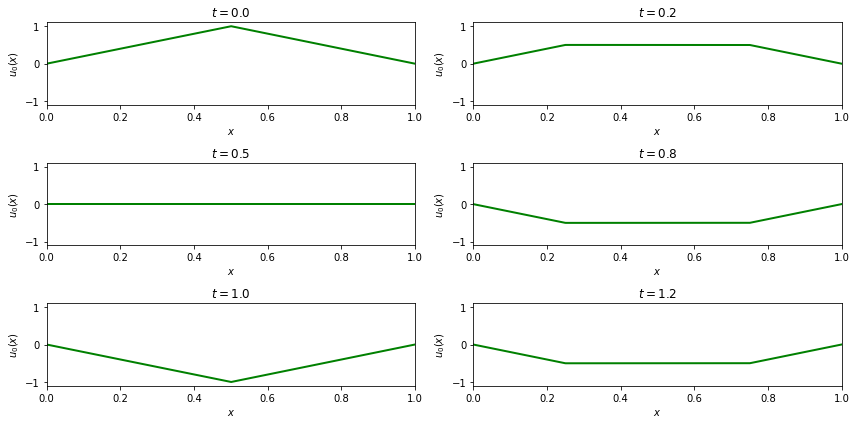

In [133]:
t_array = np.array([0., .25,  .5,\
                    .75, 1.,  1.25])

fig_array = plt.figure(figsize=(12,6), num='triangle wave')

for i, t_now in enumerate(t_array): 
    ax_array = fig_array.add_subplot(3, 2, i+1)
    ax_array.set_xlim(x_min, x_max)
    gap = 0.1
    ax_array.set_ylim(-1.1, 1.1)
    ax_array.set_xlabel(r'$x$')
    ax_array.set_ylabel(r'$u_0(x)$')
    ax_array.set_title(rf'$t = {t_now:.1f}$')

    ax_array.plot(x_pts, 
                  u_wave(x_pts, t_now, m_max=300, L=L), 
                  color='green', lw=2)

fig_array.tight_layout()
fig_array.savefig('Taylor_16_14_vibration.png', 
                   bbox_inches='tight')  

In [128]:
# Set up the t mesh for the animation.  The maximum value of t shown in
#  the movie will be t_min + delta_t * frame_number
t_min = 0.   # You can make this negative to see what happens before t=0!
t_max = 30.
delta_t = 0.1
t_pts = np.arange(t_min, t_max+delta_t, delta_t)


In [129]:
%%capture

fig_anim = plt.figure(figsize=(6,2), num='Standing wave')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
gap = 0.1
ax_anim.set_ylim(-1.1, 1.1)

# By assigning the first return from plot to line_anim, we can later change
#  the values in the line.
line_anim, = ax_anim.plot(x_pts, 
                          u_wave(x_pts, t_min, m_max=300, L=L), 
                          color='green', lw=2)

fig_anim.tight_layout()

In [130]:
def animate_wave(i):
    """This is the function called by FuncAnimation to create each frame,
        numbered by i.  So each i corresponds to a point in the t_pts
        array, with index i.
    """
    t = t_pts[i]
    y_pts = u_wave(x_pts, t, m_max=300, L=L)

    line_anim.set_data(x_pts, y_pts)  # overwrite line_anim with new points
    return (line_anim,)   # this is needed for blit=True to work

In [131]:
frame_interval = 40.  # time between frames
frame_number = int(np.abs(t_max-t_min)/delta_t)    # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_wave, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=False,
                               repeat=False)

In [132]:
HTML(anim.to_jshtml())